In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpldatacursor import datacursor
import plotly.plotly as py

sns.set(style="ticks")

# %matplotlib inline
%matplotlib nbagg

In [3]:
data = pd.read_csv('/Users/apple/Desktop/Data science/datasets/API_ILO_country_YU.csv')

In [4]:
data.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [5]:
data.shape

(219, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
Country Name    219 non-null object
Country Code    219 non-null object
2010            219 non-null float64
2011            219 non-null float64
2012            219 non-null float64
2013            219 non-null float64
2014            219 non-null float64
dtypes: float64(5), object(2)
memory usage: 12.1+ KB


In [7]:
data.describe()

,2010,2011,2012,2013,2014
count,219.000000,219.000000,219.000000,219.000000,219.000000
mean,17.892957,17.902713,18.148142,18.100429,17.943539
std,10.540099,10.887558,11.430862,11.674366,11.554674
min,0.700000,0.700000,0.500000,0.700000,0.700000
25%,10.600000,10.410530,10.500000,10.490677,10.500000
50%,14.900000,14.523908,14.400000,14.100000,14.124300
75%,23.000000,23.200001,24.616293,23.435561,23.310668
max,57.200001,57.099998,61.700001,58.000000,57.900002


In [8]:
len(data['Country Code'].unique()) / len(data)

1.0

In [34]:
#2010
min_countries_2010 = data.sort_values(by=['2010'])[['Country Name', '2010']].head(10)
min_countries_2010.columns = ['Country Name', 'year']
min_countries_2011 = data.sort_values(by=['2011'])[['Country Name', '2011']].head(10)
min_countries_2011.columns = ['Country Name', 'year']
min_countries_2012 = data.sort_values(by=['2012'])[['Country Name', '2012']].head(10)
min_countries_2012.columns = ['Country Name', 'year']
min_countries_2013 = data.sort_values(by=['2013'])[['Country Name', '2013']].head(10)
min_countries_2013.columns = ['Country Name', 'year']
min_countries_2014 = data.sort_values(by=['2014'])[['Country Name', '2014']].head(10)
min_countries_2014.columns = ['Country Name', 'year']

In [10]:
pd.set_option('display.max_rows', None)

In [13]:
meltData = pd.melt(data, id_vars=['Country Name', 'Country Code'], var_name='year')

<IPython.core.display.Javascript object>


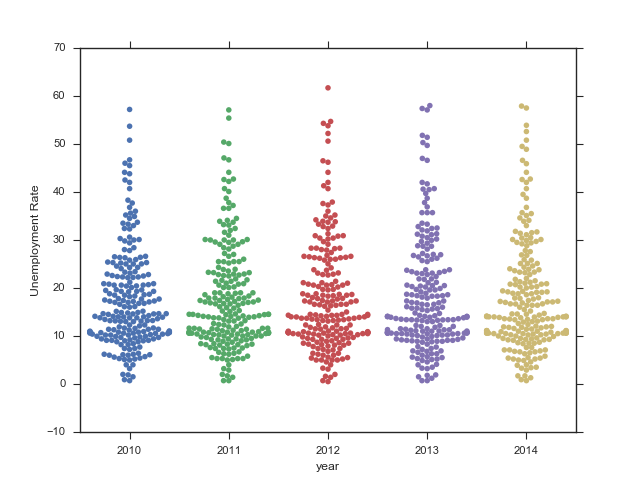

In [32]:
plt.figure()
sns.swarmplot(x="year", y="value", data=meltData);
plt.gca().set_ylabel('Unemployment Rate')

<IPython.core.display.Javascript object>


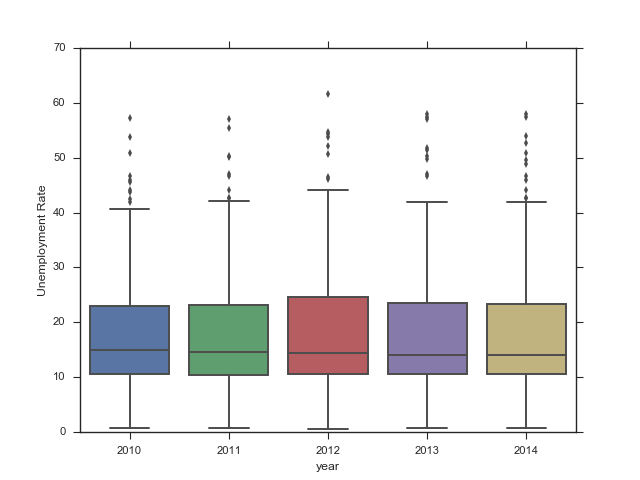

In [31]:
plt.figure()
sns.boxplot(x="year", y="value", data=meltData);
plt.gca().set_ylabel('Unemployment Rate')

<IPython.core.display.Javascript object>


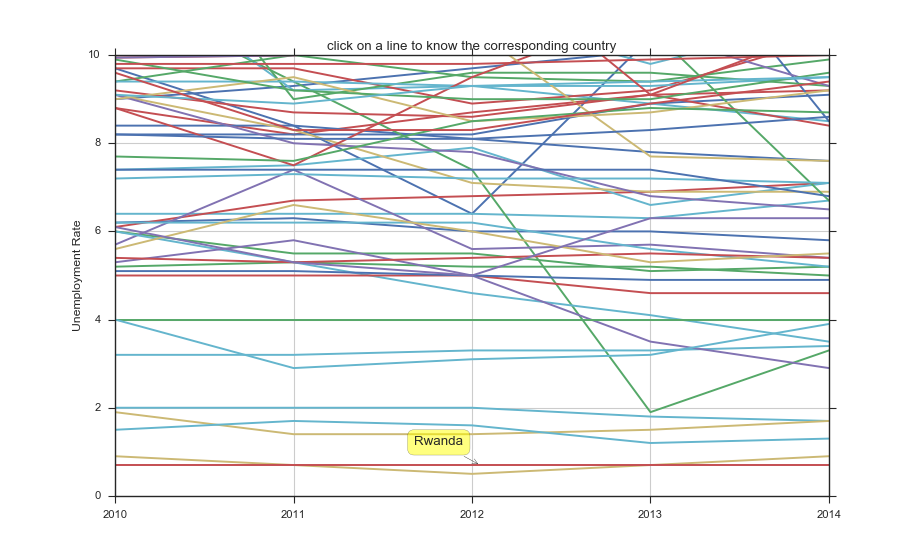

In [84]:
plt.figure()
meltDataGrouped = meltData.groupby(['Country Name'])
fig = plt.gcf()
fig.set_size_inches(25, 10.5)
for group, frame in meltDataGrouped:
#     sns.factorplot(x="year", y="value", data=frame, label=group)
    plt.plot(frame['year'], frame['value'], label=group)
    
axes = plt.gca()
axes.set_xticks([2010, 2011, 2012, 2013, 2014])
axes.set_xticklabels(['2010', '2011', '2012', '2013','2014'])
axes.set_ylim([0,10])
axes.set_ylabel('Unemployment Rate')

plt.grid()

axes.set_title('click on a line to know the corresponding country')

datacursor(formatter='{label}'.format)
plt.show()

In [22]:
data['all_years'] = data['2010'] + data['2011'] + data['2012'] + data['2013'] + data['2014']
min_countries = data.sort_values(by=['all_years'])[['Country Name', 'all_years']].head(10)
data.drop(['all_years'], axis=1, inplace=True)
min_countries

,Country Name,all_years
168,Rwanda,3.5
102,Cambodia,3.7
165,Qatar,7.3
69,Guinea,7.9
12,Benin,9.5
106,Lao PDR,16.4
192,Thailand,17.1
148,Nepal,20.0
121,"Macao SAR, China",22.5
99,Kazakhstan,23.5
